In [9]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [10]:
seed = 7
numpy.random.seed(seed)

In [11]:
# load dataset
dataframe = pandas.read_csv("DONNES/train_cap2018.csv")
dataset = dataframe.values

X = dataframe.iloc[:,1:59]
Y = dataframe.iloc[:,59]

X, X_test, Y, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


where_are_NaNs = numpy.isnan(X) #Remplace les valeurs NaN par des 0
X[where_are_NaNs] = 0

where_are_NaNs = numpy.isnan(X_test) #Remplace les valeurs NaN par des 0
X_test[where_are_NaNs] = 0

#print(X)

#Normalisation 

scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)

#print(X)
#print(Y)

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#print(encoded_Y)
#list(encoder.inverse_transform(encoded_Y)) la démarche inverse

In [13]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=58, kernel_initializer='normal', activation='relu'))
	model.add(Dense(500, activation='relu'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [14]:
model = baseline_model()
model.fit(X, dummy_y, epochs=100, batch_size=32) #Attention aux paramètres, certains changement provoquent l'overfitting !

Epoch 1/100
16386/16386 [==============================] - 1s 49us/step - loss: 0.7304 - acc: 0.7160
Epoch 2/100
16386/16386 [==============================] - 1s 38us/step - loss: 0.5981 - acc: 0.7708
Epoch 3/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.5621 - acc: 0.7853
Epoch 4/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.5352 - acc: 0.7935
Epoch 5/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.5133 - acc: 0.8004
Epoch 6/100
16386/16386 [==============================] - 1s 39us/step - loss: 0.4991 - acc: 0.8084
Epoch 7/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.4843 - acc: 0.8158
Epoch 8/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.4716 - acc: 0.8216
Epoch 9/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.4614 - acc: 0.8202
Epoch 10/100
16386/16386 [==============================] - 1s 38us/step - loss: 0.4521 - a

16386/16386 [==============================] - 1s 36us/step - loss: 0.0484 - acc: 0.9842
Epoch 82/100
16386/16386 [==============================] - 1s 41us/step - loss: 0.0394 - acc: 0.9884
Epoch 83/100
16386/16386 [==============================] - 1s 43us/step - loss: 0.0341 - acc: 0.9903
Epoch 84/100
16386/16386 [==============================] - 1s 42us/step - loss: 0.0862 - acc: 0.9694
Epoch 85/100
16386/16386 [==============================] - 1s 40us/step - loss: 0.0533 - acc: 0.9820
Epoch 86/100
16386/16386 [==============================] - 1s 40us/step - loss: 0.0311 - acc: 0.9917
Epoch 87/100
16386/16386 [==============================] - 1s 39us/step - loss: 0.0235 - acc: 0.9940
Epoch 88/100
16386/16386 [==============================] - 1s 40us/step - loss: 0.0586 - acc: 0.9811
Epoch 89/100
16386/16386 [==============================] - 1s 40us/step - loss: 0.0777 - acc: 0.9746
Epoch 90/100
16386/16386 [==============================] - 1s 44us/step - loss: 0.0414 - acc: 

In [15]:
# evaluation du modèle
scores = model.evaluate(X, dummy_y)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


16386/16386 [==============================] - 0s 16us/step

loss: 2.39%

acc: 99.27%


In [16]:
#Utilisée pour calculer les effectifs par classe
def counter(attr) :
    unique, counts = numpy.unique(attr, return_counts=True)
    return dict(zip(unique, counts))

In [17]:
#predictions = model.predict(X)
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)

print(classes)


['A2' 'B1' 'A1' ... 'A1' 'B1' 'A1']


C:\Users\Noctis\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'A1': 4662, 'A2': 2844, 'B1': 2276, 'B2': 913, 'C1': 214, 'C2': 15}

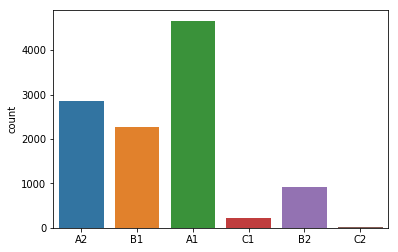

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(classes,label="Count")
#plt.show()

counter(classes)

#Bizarrement, il peut etre nécéssaire de lancer 2 fois pour obtenir l'affichage
#Bizarrement2 : l'ordre de l'affihage des classes n'est pas le meme sur les courbes, on a pas su trouver pourquoi :( 

{'A1': 4543, 'A2': 3072, 'B1': 2137, 'B2': 955, 'C1': 195, 'C2': 22}

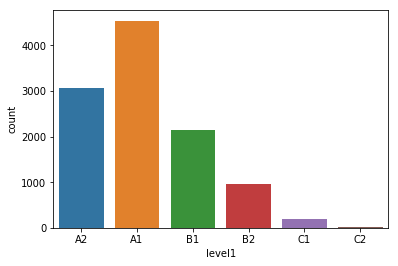

In [29]:
sns.countplot(y_test,label="Count")
#plt.show()

  
counter(y_test)